# CS6140 Machine Learning: Assignment 3 (F22) (Total Points: 100)
## Prof. Ahmad Uzair


# ROC and Precision Recall curves

1. Generate data: Simulate a binary classification problem by generating a vector of class labels. Size 100. Generate a vector of predictor estimates using a random number generator. **(5 Points)**

2. Calculate and plot ROC and Precision-Recall curves. **(20 Points)**

3. Match your curve generated with sklearn. **(5 Points)**



In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import random

In [ ]:
df = np.zeros(100)
val = random.sample(range(100), 50)
val.sort()
for i in val:
    df[i] = 1
df1 = [random.random() for _ in range(0, 100)]
dataframe = pd.DataFrame({'True Value': df.tolist(), 'Values': df1})
twoFive = []
fiveZero = []
sevenFive = []
nineFive = []
for i in range (len(df1)):
    if df1[i] > 0.25:
        twoFive.append(1)
    if df1[i] < 0.25:
        twoFive.append(0)
    if df1[i] > 0.50:
        fiveZero.append(1)
    if df1[i] < 0.50:
        fiveZero.append(0)
    if df1[i] > 0.75:
        sevenFive.append(1)
    if df1[i] < 0.75: 
        sevenFive.append(0)
    if df1[i] > 0.95:
        nineFive.append(1)
    if df1[i] < 0.95:
        nineFive.append(0)
dataframe['twoFive'] = twoFive
dataframe['fiveZero'] = fiveZero
dataframe['sevenFive'] = sevenFive
dataframe['nineFive'] = nineFive
dataframe

,True Value,Values,twoFive,fiveZero,sevenFive,nineFive
0,1.0,0.973223,1,1,1,1
1,1.0,0.476331,1,0,0,0
2,1.0,0.295554,1,0,0,0
3,1.0,0.202609,0,0,0,0
4,0.0,0.817914,1,1,1,0
...,...,...,...,...,...,...
95,0.0,0.585145,1,1,0,0
96,1.0,0.454215,1,0,0,0
97,1.0,0.155203,0,0,0,0
98,1.0,0.940987,1,1,1,0


In [ ]:
def helper(y_true, y_score):
    y_score = y_score.ravel()
    y_true = y_true == 1
    descending_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
    y_score = y_score[descending_score_indices]
    y_true = y_true[descending_score_indices]
    distinct_value_indices = np.where(np.diff(y_score))[0]
    threshold_index = np.r_[distinct_value_indices, y_true.size - 1]
    true_positive = np.cumsum(y_true * 1.0)[threshold_index]
    false_positive = 1 + threshold_index - true_positive
    return false_positive, true_positive, y_score[threshold_index]

In [ ]:
def precision_recall(y_true, predicted):
    false_positive, true_positive, thresholds = helper(y_true, predicted)
    positive = true_positive + false_positive
    precision = np.zeros_like(true_positive)
    np.divide(true_positive, positive, out=precision, where=(positive != 0))
    recall = true_positive / true_positive[-1]
    sl = slice(None, None, -1)
    return np.hstack((precision[sl], 1)), np.hstack((recall[sl], 0)), thresholds[sl]

In [ ]:
twoFive = dataframe['twoFive'].to_numpy()
true = dataframe['True Value'].to_numpy()
prec,rec,thresh = precision_recall(true, twoFive)
print(prec,rec,thresh)

[0.5        0.46835443 1.        ] [1.   0.74 0.  ] [0 1]


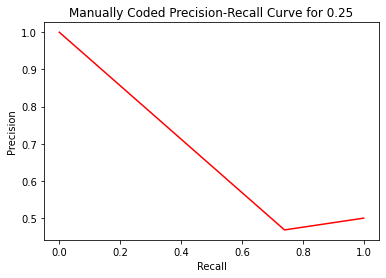

In [ ]:
fig, ax = plt.subplots()
ax.plot(rec, prec, color='red')
ax.set_title('Manually Coded Precision-Recall Curve for 0.25')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

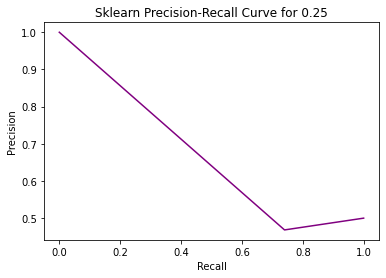

In [ ]:
precision, recall, thresholds = precision_recall_curve(true, twoFive)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Sklearn Precision-Recall Curve for 0.25')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
fiveZero = dataframe['fiveZero'].to_numpy()
true = dataframe['True Value'].to_numpy()
prec,rec,thresh = precision_recall(true, fiveZero)
print(prec,rec,thresh)

[0.5        0.48148148 1.        ] [1.   0.52 0.  ] [0 1]


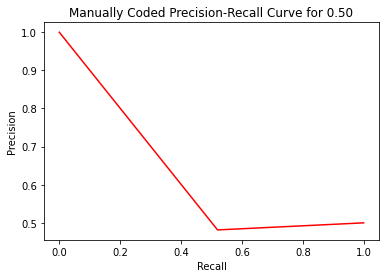

In [ ]:
fig, ax = plt.subplots()
ax.plot(rec, prec, color='red')
ax.set_title('Manually Coded Precision-Recall Curve for 0.50')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

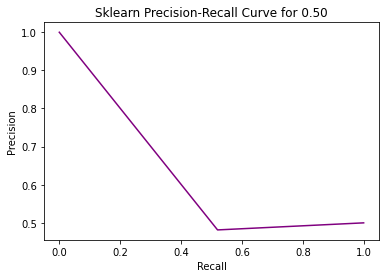

In [ ]:
precision, recall, thresholds = precision_recall_curve(true, fiveZero)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Sklearn Precision-Recall Curve for 0.50')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
sevenFive = dataframe['sevenFive'].to_numpy()
true = dataframe['True Value'].to_numpy()
prec,rec,thresh = precision_recall(true, sevenFive)
print(prec,rec,thresh)

[0.5       0.5483871 1.       ] [1.   0.34 0.  ] [0 1]


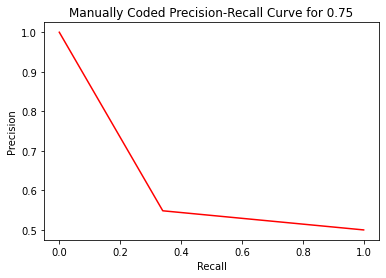

In [ ]:
fig, ax = plt.subplots()
ax.plot(rec, prec, color='red')
ax.set_title('Manually Coded Precision-Recall Curve for 0.75')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

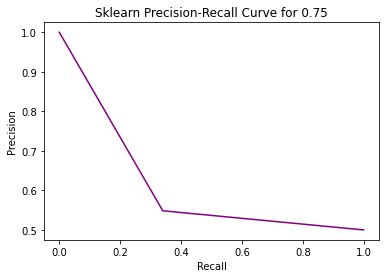

In [ ]:
precision, recall, thresholds = precision_recall_curve(true, sevenFive)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Sklearn Precision-Recall Curve for 0.75')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
nineFive = dataframe['nineFive'].to_numpy()
true = dataframe['True Value'].to_numpy()
prec,rec,thresh = precision_recall(true, nineFive)
print(prec,rec,thresh)

[0.5 0.5 1. ] [1.   0.04 0.  ] [0 1]


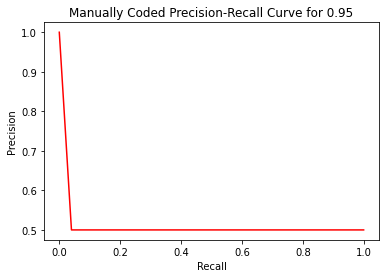

In [ ]:
fig, ax = plt.subplots()
ax.plot(rec, prec, color='red')
ax.set_title('Manually Coded Precision-Recall Curve for 0.95')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

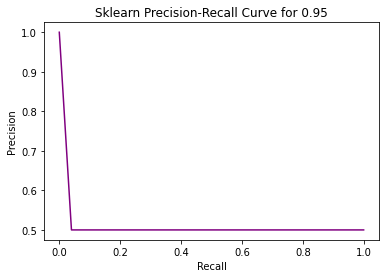

In [ ]:
precision, recall, thresholds = precision_recall_curve(true, nineFive)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Sklearn Precision-Recall Curve for 0.95')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
def roc(y_true, y_score):
    false_positive, true_positive, thresholds = helper(y_true, y_score)
    true_positive = np.r_[0, true_positive]
    false_positive = np.r_[0, false_positive]
    if false_positive[-1] <= 0:
        fpr = np.repeat(np.nan, false_positive.shape)
    else:
        fpr = false_positive / false_positive[-1]
    if true_positive[-1] <= 0:
        tpr = np.repeat(np.nan, true_positive.shape)
    else:
        tpr = true_positive / true_positive[-1]
    return fpr, tpr

In [ ]:
twoFive = dataframe['twoFive'].to_numpy()
true = dataframe['True Value'].to_numpy()
fpr, tpr = roc(true,  twoFive)
print(fpr, tpr)

[0.   0.84 1.  ] [0.   0.74 1.  ]


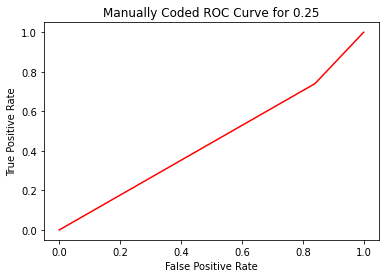

In [ ]:
plt.plot(fpr,tpr, color='red')
plt.title('Manually Coded ROC Curve for 0.25')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

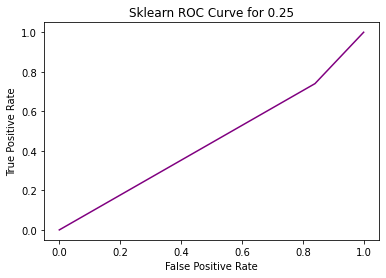

In [ ]:
fpr, tpr, _ = metrics.roc_curve(true,  twoFive)
plt.plot(fpr,tpr, color='purple')
plt.title('Sklearn ROC Curve for 0.25')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
fiveZero = dataframe['fiveZero'].to_numpy()
true = dataframe['True Value'].to_numpy()
fpr, tpr = roc(true,  fiveZero)
print(fpr, tpr)

[0.   0.56 1.  ] [0.   0.52 1.  ]


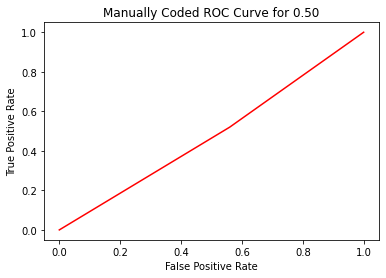

In [ ]:
plt.plot(fpr,tpr, color='red')
plt.title('Manually Coded ROC Curve for 0.50')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

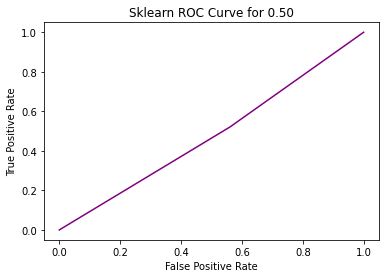

In [ ]:
fpr, tpr, _ = metrics.roc_curve(true,  fiveZero)
plt.plot(fpr,tpr, color='purple')
plt.title('Sklearn ROC Curve for 0.50')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
sevenFive = dataframe['sevenFive'].to_numpy()
true = dataframe['True Value'].to_numpy()
fpr, tpr = roc(true,  sevenFive)
print(fpr, tpr)

[0.   0.28 1.  ] [0.   0.34 1.  ]


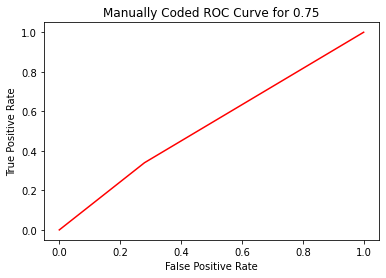

In [ ]:
plt.plot(fpr,tpr, color='red')
plt.title('Manually Coded ROC Curve for 0.75')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

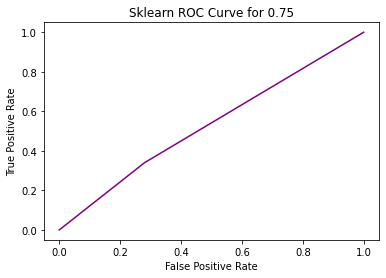

In [ ]:
fpr, tpr, _ = metrics.roc_curve(true, sevenFive)
plt.plot(fpr,tpr, color='purple')
plt.title('Sklearn ROC Curve for 0.75')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
nineFive = dataframe['nineFive'].to_numpy()
true = dataframe['True Value'].to_numpy()
fpr, tpr = roc(true,  nineFive)
print(fpr, tpr)

[0.   0.04 1.  ] [0.   0.04 1.  ]


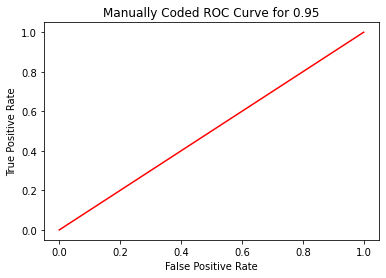

In [ ]:
plt.plot(fpr,tpr, color='red')
plt.title('Manually Coded ROC Curve for 0.95')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

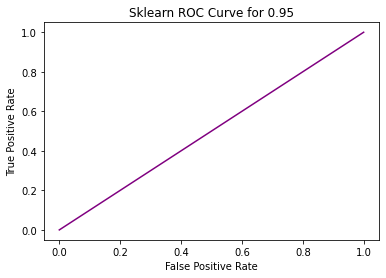

In [ ]:
fpr, tpr, _ = metrics.roc_curve(true,  nineFive)
plt.plot(fpr,tpr, color='purple')
plt.title('Sklearn ROC Curve for 0.95')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest classifier 
1. Load iris data set.

```{python}
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
```

Investigate following parameters of Random Forest classifier and tune them using Randomized Search and Grid Search. 

```{python}
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 11,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
```
2. Use seed 1 to split data in 80-20 train-test configuration.  Train a Random Forest classifier with each unique configuration and record train/test accuracy, precision and recall in the results dataframe. This dataframe will have 5 columns (each corresponding to tuning parameter) and each row will correspond to each unique configuration. 5x5x5x5x5 rows. Analyse of the impact of each tuning parameter on predictor performance. **(15 Points)**

3. From the results of the above find the best estimators and use them for classifcation once again and evaluate the performance using 10 fold cross validation. **(15 Points)**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, make_scorer, recall_score, accuracy_score, precision_score
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = load_iris(as_frame=True)
df_iris = iris.data
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
frame_iris = df_iris
frame_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df_target = iris.target
df_target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
raw_df = frame_iris.merge(df_target, left_index=True, right_index=True)
raw_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df_feature_names = iris.feature_names
df_feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df_target_names = iris.target_names
df_target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_iris, df_target, test_size=0.20, random_state=1)

In [ ]:
sk_model_rf = RandomForestClassifier()
sk_model_rf.fit(X_train, y_train)
sk_predict_rf = sk_model_rf.predict(X_test)

score_train = sk_model_rf.score(X_train, y_train)
print(f"Mean Train Accuracy: {score_train*100}% ")

Mean Train Accuracy: 100.0% 


In [ ]:
score_test = sk_model_rf.score(X_test, y_test)
print(f"Mean Test Accuracy: {score_test*100}% ")

Mean Test Accuracy: 96.66666666666667% 


In [ ]:
print(f"{classification_report(y_test, sk_predict_rf)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



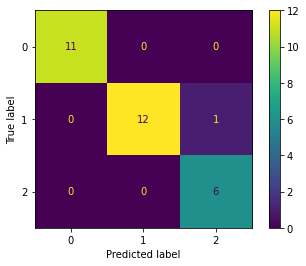

In [ ]:
conf_matrix = confusion_matrix(y_test, sk_predict_rf, labels=sk_model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sk_model_rf.classes_)
disp.plot()
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 20, num = 16)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 8, 11,14]
min_samples_leaf = [1, 2, 4,6,8]

In [ ]:
hyperparam_grid = {'n_estimators': n_estimators, 
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf
}

scorers = {'precision_score': make_scorer(precision_score, average='macro'),
           'recall_score': make_scorer(recall_score, average='macro'),
           'accuracy_score': make_scorer(accuracy_score)
}

In [ ]:
sk_model_rf = RandomForestClassifier()

In [ ]:
cv_search = RandomizedSearchCV(estimator=sk_model_rf, param_distributions=hyperparam_grid, scoring=scorers, refit='accuracy_score', n_jobs=-1, n_iter=750, return_train_score=True)
bp = cv_search.fit(X_train, y_train)
print("Best parameters for accuracy_score:\n", bp.best_params_)

Best parameters for accuracy_score:
 {'n_estimators': 11, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 780}


In [ ]:
RandomizedSearchCV_results = pd.DataFrame(cv_search.cv_results_)
RandomizedSearchCV_results = RandomizedSearchCV_results.sort_values(by='mean_test_accuracy_score', ascending=False)
RandomizedSearchCV_results = RandomizedSearchCV_results.fillna(0)
RandomizedSearchCV_results_updated = RandomizedSearchCV_results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_n_estimators', 'param_max_features', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']].round(3)
RandomizedSearchCV_results_updated

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf
232,0.978,0.975,0.975,9,sqrt,230,8,1
13,0.978,0.975,0.975,11,auto,780,5,8
461,0.978,0.975,0.975,18,log2,890,2,6
354,0.978,0.975,0.975,18,sqrt,890,2,4
300,0.979,0.973,0.975,6,sqrt,780,8,1
...,...,...,...,...,...,...,...,...
38,0.933,0.918,0.917,5,sqrt,120,11,4
433,0.933,0.918,0.917,10,auto,780,14,6
492,0.933,0.918,0.917,12,log2,10,11,2
245,0.920,0.912,0.908,16,sqrt,230,5,8


In [ ]:
print("Best RandomizedSearchCV Accuracy = {:0.2f}%".format(RandomizedSearchCV_results_updated['mean_test_accuracy_score'].max()*100))

Best RandomizedSearchCV Accuracy = 97.50%


In [ ]:
cv_search = GridSearchCV(estimator=sk_model_rf, param_grid=hyperparam_grid, scoring=scorers, refit='precision_score', n_jobs=-1, return_train_score=True)
bp = cv_search.fit(X_train, y_train)
print("Best parameters for accuracy_score:\n", bp.best_params_)

Best parameters for accuracy_score:
 {'max_depth': 560, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 13}


In [ ]:
GridSearchCV_results = pd.DataFrame(cv_search.cv_results_)
GridSearchCV_results = GridSearchCV_results.sort_values(by='mean_test_accuracy_score', ascending=False)
GridSearchCV_results = GridSearchCV_results.fillna(0)
GridSearchCV_results_updated = GridSearchCV_results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_n_estimators', 'param_max_features', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']].round(3)
GridSearchCV_results_updated

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf
11905,0.986,0.982,0.983,6,log2,1000,14,6
6504,0.986,0.982,0.983,13,sqrt,560,5,2
3521,0.983,0.983,0.983,6,log2,230,2,8
3016,0.979,0.973,0.975,13,sqrt,230,11,4
3857,0.978,0.975,0.975,6,auto,340,5,6
...,...,...,...,...,...,...,...,...
11507,0.923,0.909,0.908,8,sqrt,1000,14,6
2560,0.911,0.903,0.900,5,auto,230,2,4
10064,0.912,0.904,0.900,5,sqrt,890,14,1
10338,0.912,0.904,0.900,7,sqrt,890,5,8


In [ ]:
base_random_forest_model = RandomForestClassifier(n_estimators=10, random_state=1)
base_random_forest_model.fit(X_train, y_train)
base_accuracy = base_random_forest_model.score(X_test, y_test)

print("Baseline Accuracy = {:0.2f}%".format(base_accuracy*100))
print("Best RandomizedSearchCV Accuracy = {:0.2f}%".format(RandomizedSearchCV_results_updated['mean_test_accuracy_score'].max()*100))
print("Best GridSearchCV Accuracy = {:0.2f}%".format(GridSearchCV_results_updated['mean_test_accuracy_score'].max()*100))

Baseline Accuracy = 96.67%
Best RandomizedSearchCV Accuracy = 97.50%
Best GridSearchCV Accuracy = 98.30%


In [ ]:
clf = RandomForestClassifier(max_depth=560, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=13)
score = cross_val_score(clf, df_iris, df_target, cv=10)
print("Final Accuracy = {:0.2f}%".format(score.mean()*100))

Final Accuracy = 96.00%


# Hierarchical Agglomerative Clustering HAC

Load iris dataset from sklearn.
```{python}
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
```
1. Implement HAC algorithm. Use the abstract class definition provided below. **(15 Points)**

2. Test your code first with uni-variate data as following; **(10 Points)**
```{python}
x = {'JAN':31.9, 'FEB':32.3, 'MAR':35, 'APR':52, 'MAY':60.8, 'JUN':68.7, 'JUL':73.3, 'AUG':72.1, 'SEP':65.2, 'OCT':54.8, 'NOV':40, 'DEC':38}
hac = HAC(param={'dist': 'eucl'})
hac.fit(x)
for c in hac.dendrogram:
    print(c)
```
Expected output:
```
(0, ['JAN', 'FEB'], 0.4)
(1, ['JUL', 'AUG'], 1.2)
(2, ['NOV', 'DEC'], 2.0)
(3, ['APR', 'OCT'], 2.8)
(4, ['JAN', 'FEB', 'MAR'], 2.9)
(5, ['JUN', 'SEP'], 3.5)
(6, ['APR', 'OCT', 'MAY'], 7.4)
```

2. Fit the HAC model to iris dataset. Print the heirarchy of clusters creatively. It need not to be a dendrogram but you can use [sklearn implementation](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py) for comparison. **(15 Points)**



In [ ]:
import itertools
from scipy.cluster import hierarchy

class HAC:
  def __init__(self, X, param):
    self.X = X
    self.__distances__(param['dist'])
    
  
  def __distances__(self, dist='eucl'):
    '''
    Implement __distances__ method to calculate pair-wise distances 
    among datapoint in X with respect to distance measures
    - eucl : eucledean distance
    - manh : manhattan
    - misk : miskownski
    '''
    if dist not in ['eucl', 'manh', 'misk']:
      raise Exception('Not a valid dist measure. Choose among eucl, manh, misk')
    self.C = self.X.shape[0]
    self.dist = np.zeros((self.C, self.C))
    for i in range(self.C):
      for j in range(self.C):
        if dist == 'eucl':
          distances = np.linalg.norm(self.X[i] - self.X[j])
          distances = np.where(distances == 0.0, np.inf, distances)
          self.dist[i,j] = distances
        elif dist == 'manh':
          distances = np.sum(np.abs(self.X[i] - self.X[j]))
          distances = np.where(distances == 0.0, np.inf, distances)
          self.dist[i,j] = np.sum(np.abs(self.X[i] - self.X[j]))
        elif dist == 'misk':
          distances = np.sum(np.abs(self.X[i] - self.X[j]) ** 3)
          distances = np.where(distances == 0.0, np.inf, distances)
          self.dist[i,j] = np.sum(np.abs(self.X[i] - self.X[j]) ** 3)
      
      
  def flatten(self,A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(self.flatten(i))
        else: rt.append(i)
    return rt    
    

  def __merge__(self):
    '''
    Implement __merge__ method to recursively merge the nearest datapoints in X
    using pair-wise distances matrix X. 
    Save the merge results at each iteration/'recursive call' 
    in dendrogram list of clusters.
    '''
    self.x_init_pos = np.argsort(self.dist[0,:])
    self.dendrogram = []
    self.merge_col_index = []
    self.min_dist = []
    for i in range(len(self.labels)-1):
      min_dist = np.min(self.dist)
      self.min_dist.append(min_dist)
      min_dist_index = np.where(self.dist == min_dist)
      first_point_index = min_dist_index[0][0]
      second_point_index = min_dist_index[1][0]
      first_point = min(first_point_index, second_point_index)
      second_point = max(first_point_index, second_point_index)
      first_node = self.labels[first_point_index]
      second_node = self.labels[second_point_index]
      first_node = self.flatten(first_node)[0] if isinstance(first_node, list) else first_node
      second_node = self.flatten(second_node)[0] if isinstance(second_node, list) else second_node
      self.merge_col_index.append([self.x_axis_labels.index(first_node), self.x_axis_labels.index(second_node)])
      clusters = self.flatten([self.labels[first_point_index], self.labels[second_point_index]])
      new_point_distances = []
      for index in range(len(self.labels)):
        if index != first_point_index and index != second_point_index:
          p1 = self.dist[first_point_index, index]
          p2 = self.dist[second_point_index, index]
          data = None
          if p1 == np.inf:
            data = p2
          elif p2 == np.inf:
            data = p1
          else:
            data = max(p1, p2)
          new_point_distances.append(data)
      self.dist = np.delete(self.dist, first_point_index, axis=0)
      self.dist = np.delete(self.dist, first_point_index, axis=1)
      self.dist = np.delete(self.dist, second_point_index-1, axis=0)
      self.dist = np.delete(self.dist, second_point_index-1, axis=1)
      self.dist = np.insert(self.dist, self.C-i-2, new_point_distances, axis=0)
      new_point_distances.append(np.Inf)
      self.dist = np.insert(self.dist, self.C-i-2, new_point_distances, axis=1)
      self.labels.pop(first_point_index)
      self.labels.pop(second_point_index-1)
      self.labels.append(clusters)
      output = (i, clusters, round(min_dist,2))
      self.dendrogram.append(output)
   

  def __display__(self):
    '''
    Implement __display__ method to cretively show the contents of dendrogram.    
    '''
    
    for c in self.dendrogram:
      print(c)
      

  def fit(self, X):
    self.X = np.array(list(X.values()))
    self.labels = list(X.keys())
    self.x_axis_labels = list(X.keys())
    self.__distances__()
    self.__merge__()

In [ ]:
x = {'JAN':31.9, 'FEB':32.3, 'MAR':35, 'APR':52, 'MAY':60.8, 'JUN':68.7, 'JUL':73.3, 'AUG':72.1, 'SEP':65.2, 'OCT':54.8, 'NOV':40, 'DEC':38}
hac = HAC(np.array(list(x.values())), param={'dist': 'eucl'})
hac.fit(x)
for c in hac.dendrogram:
    print(c)

(0, ['JAN', 'FEB'], 0.4)
(1, ['JUL', 'AUG'], 1.2)
(2, ['NOV', 'DEC'], 2.0)
(3, ['APR', 'OCT'], 2.8)
(4, ['MAR', 'JAN', 'FEB'], 3.1)
(5, ['JUN', 'SEP'], 3.5)
(6, ['MAY', 'JUN', 'SEP'], 7.9)
(7, ['NOV', 'DEC', 'MAR', 'JAN', 'FEB'], 8.1)
(8, ['JUL', 'AUG', 'MAY', 'JUN', 'SEP'], 12.5)
(9, ['APR', 'OCT', 'JUL', 'AUG', 'MAY', 'JUN', 'SEP'], 21.3)
(10, ['NOV', 'DEC', 'MAR', 'JAN', 'FEB', 'APR', 'OCT', 'JUL', 'AUG', 'MAY', 'JUN', 'SEP'], 41.4)


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()
iris_dict = dict()
iris_dict = {str(i):list(iris_data.iloc[i,:-1].values) for i in range(len(iris_data))}
print(iris_dict)

{'0': [5.1, 3.5, 1.4, 0.2], '1': [4.9, 3.0, 1.4, 0.2], '2': [4.7, 3.2, 1.3, 0.2], '3': [4.6, 3.1, 1.5, 0.2], '4': [5.0, 3.6, 1.4, 0.2], '5': [5.4, 3.9, 1.7, 0.4], '6': [4.6, 3.4, 1.4, 0.3], '7': [5.0, 3.4, 1.5, 0.2], '8': [4.4, 2.9, 1.4, 0.2], '9': [4.9, 3.1, 1.5, 0.1], '10': [5.4, 3.7, 1.5, 0.2], '11': [4.8, 3.4, 1.6, 0.2], '12': [4.8, 3.0, 1.4, 0.1], '13': [4.3, 3.0, 1.1, 0.1], '14': [5.8, 4.0, 1.2, 0.2], '15': [5.7, 4.4, 1.5, 0.4], '16': [5.4, 3.9, 1.3, 0.4], '17': [5.1, 3.5, 1.4, 0.3], '18': [5.7, 3.8, 1.7, 0.3], '19': [5.1, 3.8, 1.5, 0.3], '20': [5.4, 3.4, 1.7, 0.2], '21': [5.1, 3.7, 1.5, 0.4], '22': [4.6, 3.6, 1.0, 0.2], '23': [5.1, 3.3, 1.7, 0.5], '24': [4.8, 3.4, 1.9, 0.2], '25': [5.0, 3.0, 1.6, 0.2], '26': [5.0, 3.4, 1.6, 0.4], '27': [5.2, 3.5, 1.5, 0.2], '28': [5.2, 3.4, 1.4, 0.2], '29': [4.7, 3.2, 1.6, 0.2], '30': [4.8, 3.1, 1.6, 0.2], '31': [5.4, 3.4, 1.5, 0.4], '32': [5.2, 4.1, 1.5, 0.1], '33': [5.5, 4.2, 1.4, 0.2], '34': [4.9, 3.1, 1.5, 0.2], '35': [5.0, 3.2, 1.2, 0.2], '

In [ ]:
hac = HAC(np.array(list(iris_dict.values())), param={'dist': 'eucl'})
hac.fit(iris_dict)
for c in hac.dendrogram:
    print(c)

(0, ['7', '39'], 0.1)
(1, ['0', '17'], 0.1)
(2, ['9', '34'], 0.1)
(3, ['128', '132'], 0.1)
(4, ['10', '48'], 0.1)
(5, ['4', '37'], 0.14)
(6, ['19', '21'], 0.14)
(7, ['29', '30'], 0.14)
(8, ['57', '93'], 0.14)
(9, ['80', '81'], 0.14)
(10, ['116', '137'], 0.14)
(11, ['8', '38'], 0.14)
(12, ['3', '47'], 0.14)
(13, ['27', '28'], 0.14)
(14, ['82', '92'], 0.14)
(15, ['95', '96'], 0.14)
(16, ['127', '138'], 0.14)
(17, ['1', '45'], 0.14)
(18, ['63', '91'], 0.14)
(19, ['65', '75'], 0.14)
(20, ['40', '0', '17'], 0.17)
(21, ['49', '7', '39'], 0.17)
(22, ['123', '126'], 0.17)
(23, ['112', '139'], 0.17)
(24, ['94', '99'], 0.17)
(25, ['88', '95', '96'], 0.17)
(26, ['66', '84'], 0.2)
(27, ['23', '26'], 0.2)
(28, ['25', '9', '34'], 0.2)
(29, ['12', '1', '45'], 0.2)
(30, ['53', '89'], 0.2)
(31, ['74', '97'], 0.2)
(32, ['110', '147'], 0.22)
(33, ['120', '143'], 0.22)
(34, ['136', '148'], 0.24)
(35, ['54', '58'], 0.24)
(36, ['46', '19', '21'], 0.24)
(37, ['78', '63', '91'], 0.24)
(38, ['140', '144'], 0.2

## Implementation of custom function for unique diagramatic representation of Hierarchical Agglomerative Clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from scipy.spatial import minkowski_distance
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def OwnHeirarchical(data, cutoff, linkage, dist):
    if dist not in ['eucl', 'manh', 'misk']:
      raise Exception('Not a valid dist measure. Choose among eucl, manh, misk')
    else:
      if dist == 'eucl':
        distance_matrix = euclidean_distances(data, data)
      elif dist == 'manh':
        distance_matrix = manhattan_distances(data, data)
      else:
        distance_matrix = minkowski_distance(data, data)
    distance_matrix = euclidean_distances(data, data)
    distance_matrix = np.tril(distance_matrix)
    distance_matrix[distance_matrix == 0] = np.inf
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf)
    if cutoff > distance_matrix.shape[0]: 
        cutoff = distance_matrix.shape[0]
    if linkage == 1:
        d = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    distance_matrix[ij_min[1]][j] = min(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
            distance_matrix[ij_min[0]] = np.inf
        return d, df[0].values
    elif linkage == 2:
        d_complete = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_complete[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    distance_matrix[ij_min[1]][j] = max(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
            distance_matrix[ij_min[0]] = np.inf
        return d_complete, df[0].values
    elif linkage == 3:
        d_average = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_average[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    distance_matrix[ij_min[1]][j] = (distance_matrix[ij_min[0]][j] + distance_matrix[ij_min[1]][j])/2.0          
            distance_matrix[ij_min[0]] = np.inf
        return d_average, df[0].values

In [ ]:
iris = datasets.load_iris()
iris_data = iris.data

## Diagram and Accuracy for Hierarchical Clustering with linkage 1

In [ ]:
d, target = OwnHeirarchical(iris_data, 147, 1, 'eucl')

In [ ]:
d

{0: (39, 7),
 1: (17, 0),
 2: (34, 9),
 3: (48, 10),
 4: (132, 128),
 5: (28, 27),
 6: (81, 80),
 7: (96, 95),
 8: (4, 0),
 9: (27, 0),
 10: (37, 4),
 11: (40, 17),
 12: (47, 3),
 13: (49, 7),
 14: (91, 63),
 15: (92, 82),
 16: (137, 116),
 17: (3, 2),
 18: (7, 0),
 19: (9, 1),
 20: (12, 1),
 21: (21, 19),
 22: (38, 8),
 23: (46, 19),
 24: (30, 29),
 25: (45, 1),
 26: (75, 65),
 27: (93, 57),
 28: (99, 96),
 29: (138, 127),
 30: (95, 88),
 31: (80, 69),
 32: (29, 9),
 33: (139, 112),
 34: (126, 123),
 35: (26, 23),
 36: (42, 38),
 37: (89, 53),
 38: (97, 74),
 39: (25, 9),
 40: (84, 66),
 41: (143, 120),
 42: (11, 7),
 43: (23, 7),
 44: (43, 26),
 45: (127, 70),
 46: (147, 110),
 47: (73, 63),
 48: (82, 67),
 49: (19, 17),
 50: (58, 54),
 51: (65, 58),
 52: (116, 103),
 53: (145, 141),
 54: (146, 123),
 55: (78, 63),
 56: (144, 140),
 57: (148, 136),
 58: (6, 2),
 59: (52, 50),
 60: (87, 68),
 61: (94, 90),
 62: (122, 105),
 63: (56, 51),
 64: (113, 101),
 65: (130, 107),
 66: (140, 12

In [ ]:
target

array([140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 146., 146., 146., 144., 146.,
       146., 146., 144., 146., 144., 144., 146., 144., 146., 144., 146.,
       146., 144., 144., 144., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 144., 144., 144., 144., 146., 146., 146., 146., 144.,
       146., 144., 144., 146., 144., 144., 144., 146., 146., 146., 144.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146.])

In [ ]:
target[target == 140] = 0
target[target == 144] = 1
target[target == 146] = 2

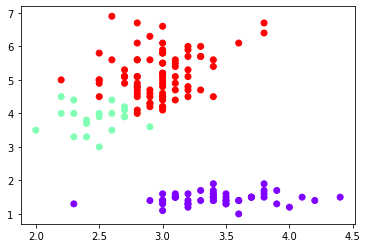

In [ ]:
plt.scatter(iris_data[:,1], iris_data[:,2], c=target, cmap="rainbow");

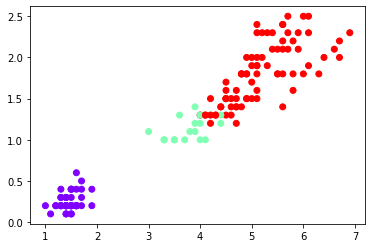

In [ ]:
plt.scatter(iris_data[:,2], iris_data[:,3], c=target, cmap="rainbow");

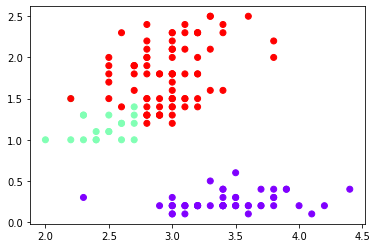

In [ ]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target, cmap="rainbow");

In [ ]:
print("Accuracy with Single Linkage: ", 100 - (iris.target != target).sum()/float(iris.target.size)*100)

Accuracy with Single Linkage:  80.0


## Diagram and Accuracy for Hierarchical Clustering with complete linkage

In [ ]:
d_complete, target_complete = OwnHeirarchical(iris_data, 147, 2, 'eucl')

In [ ]:
d_complete

{0: (39, 7),
 1: (17, 0),
 2: (34, 9),
 3: (48, 10),
 4: (132, 128),
 5: (28, 27),
 6: (81, 80),
 7: (96, 95),
 8: (4, 0),
 9: (37, 4),
 10: (40, 17),
 11: (47, 3),
 12: (49, 7),
 13: (91, 63),
 14: (92, 82),
 15: (137, 116),
 16: (12, 1),
 17: (21, 19),
 18: (27, 0),
 19: (38, 8),
 20: (46, 19),
 21: (30, 29),
 22: (45, 1),
 23: (75, 65),
 24: (93, 57),
 25: (99, 96),
 26: (138, 127),
 27: (9, 1),
 28: (139, 112),
 29: (95, 88),
 30: (126, 123),
 31: (26, 23),
 32: (42, 38),
 33: (89, 53),
 34: (97, 74),
 35: (25, 9),
 36: (84, 66),
 37: (143, 120),
 38: (11, 7),
 39: (43, 26),
 40: (147, 110),
 41: (29, 3),
 42: (73, 63),
 43: (58, 54),
 44: (145, 141),
 45: (146, 123),
 46: (78, 63),
 47: (116, 103),
 48: (144, 140),
 49: (148, 136),
 50: (6, 2),
 51: (52, 50),
 52: (80, 69),
 53: (87, 68),
 54: (94, 90),
 55: (122, 105),
 56: (56, 51),
 57: (113, 101),
 58: (130, 107),
 59: (142, 113),
 60: (86, 52),
 61: (149, 127),
 62: (31, 20),
 63: (82, 67),
 64: (124, 120),
 65: (140, 120),
 

In [ ]:
target_complete

array([141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 146., 146., 146., 143., 146.,
       143., 146., 143., 146., 143., 143., 143., 143., 143., 143., 146.,
       143., 143., 146., 143., 143., 143., 143., 143., 143., 146., 146.,
       146., 143., 143., 143., 143., 143., 143., 143., 146., 146., 146.,
       143., 143., 143., 143., 143., 143., 143., 143., 143., 143., 143.,
       143., 146., 143., 146., 146., 146., 146., 143., 146., 146., 146.,
       146., 146., 146., 143., 143., 146., 146., 146., 146., 143., 146.,
       143., 146., 143., 146., 146., 143., 143., 146., 146., 146., 146.,
       146., 143., 146., 146., 146., 146., 143., 146., 146., 146., 143.,
       146., 146., 146., 143., 146., 146., 143.])

In [ ]:
target_complete[target_complete == 141] = 0
target_complete[target_complete == 143] = 1
target_complete[target_complete == 146] = 2

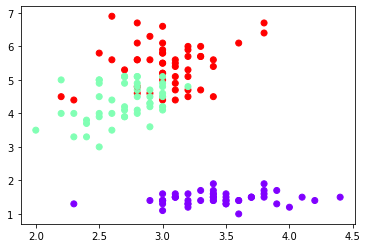

In [ ]:
plt.scatter(iris_data[:,1], iris_data[:,2], c=target_complete, cmap="rainbow");

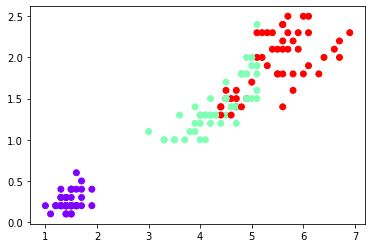

In [ ]:
plt.scatter(iris_data[:,2], iris_data[:,3], c=target_complete, cmap="rainbow");

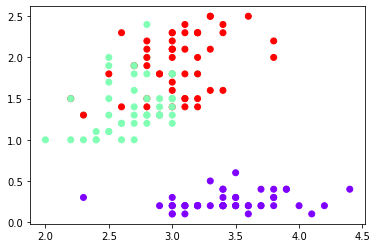

In [ ]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target_complete, cmap="rainbow");

In [ ]:
print("Accuracy with Complete Linkage: ", 100 - (iris.target != target_complete).sum()/float(iris.target.size)*100)

Accuracy with Complete Linkage:  81.33333333333333


## Diagram and Accuracy for Hierarchical Clustering with average linkage

In [ ]:
d_average, target_average = OwnHeirarchical(iris_data, 147, 3, 'eucl')

In [ ]:
d_average

{0: (39, 7),
 1: (17, 0),
 2: (34, 9),
 3: (48, 10),
 4: (132, 128),
 5: (28, 27),
 6: (81, 80),
 7: (96, 95),
 8: (4, 0),
 9: (37, 4),
 10: (40, 17),
 11: (47, 3),
 12: (49, 7),
 13: (91, 63),
 14: (92, 82),
 15: (137, 116),
 16: (27, 0),
 17: (12, 1),
 18: (21, 19),
 19: (38, 8),
 20: (46, 19),
 21: (30, 29),
 22: (45, 1),
 23: (75, 65),
 24: (93, 57),
 25: (99, 96),
 26: (138, 127),
 27: (9, 1),
 28: (95, 88),
 29: (139, 112),
 30: (126, 123),
 31: (7, 0),
 32: (3, 2),
 33: (29, 3),
 34: (26, 23),
 35: (42, 38),
 36: (89, 53),
 37: (97, 74),
 38: (25, 9),
 39: (84, 66),
 40: (80, 69),
 41: (143, 120),
 42: (11, 7),
 43: (43, 26),
 44: (147, 110),
 45: (73, 63),
 46: (58, 54),
 47: (145, 141),
 48: (146, 123),
 49: (116, 103),
 50: (78, 63),
 51: (144, 140),
 52: (148, 136),
 53: (127, 70),
 54: (82, 67),
 55: (6, 2),
 56: (52, 50),
 57: (87, 68),
 58: (94, 90),
 59: (122, 105),
 60: (56, 51),
 61: (113, 101),
 62: (130, 107),
 63: (142, 113),
 64: (65, 58),
 65: (140, 120),
 66: (19

In [ ]:
target_average

array([135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 146., 146., 146., 143., 146.,
       146., 146., 143., 146., 143., 143., 146., 143., 146., 143., 146.,
       146., 143., 146., 143., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 143., 143., 143., 143., 146., 146., 146., 146., 146.,
       146., 143., 146., 146., 143., 143., 146., 146., 146., 146., 143.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146.])

In [ ]:
target_average[target_average == 135] = 0
target_average[target_average == 143] = 1
target_average[target_average == 146] = 2

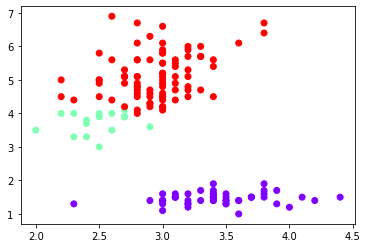

In [ ]:
plt.scatter(iris_data[:,1], iris_data[:,2], c=target_average, cmap="rainbow");

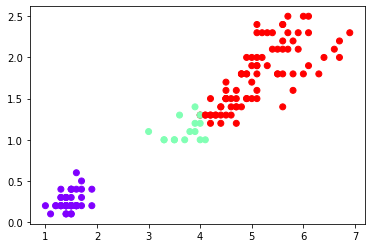

In [ ]:
plt.scatter(iris_data[:,2], iris_data[:,3], c=target_average, cmap="rainbow");

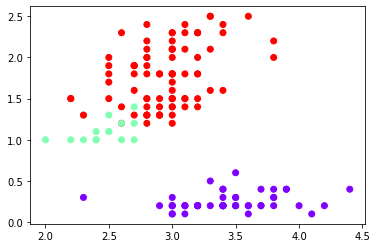

In [ ]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target_average, cmap="rainbow");

In [ ]:
print("Accuracy with Average Linkage: ", 100 - (iris.target != target_average).sum()/float(iris.target.size)*100)

Accuracy with Average Linkage:  77.33333333333334


## Sklearn Implementation for comparison

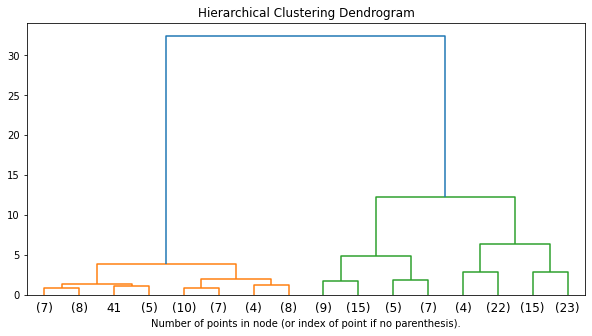

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

iris = load_iris()
X = iris.data

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(10,5))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

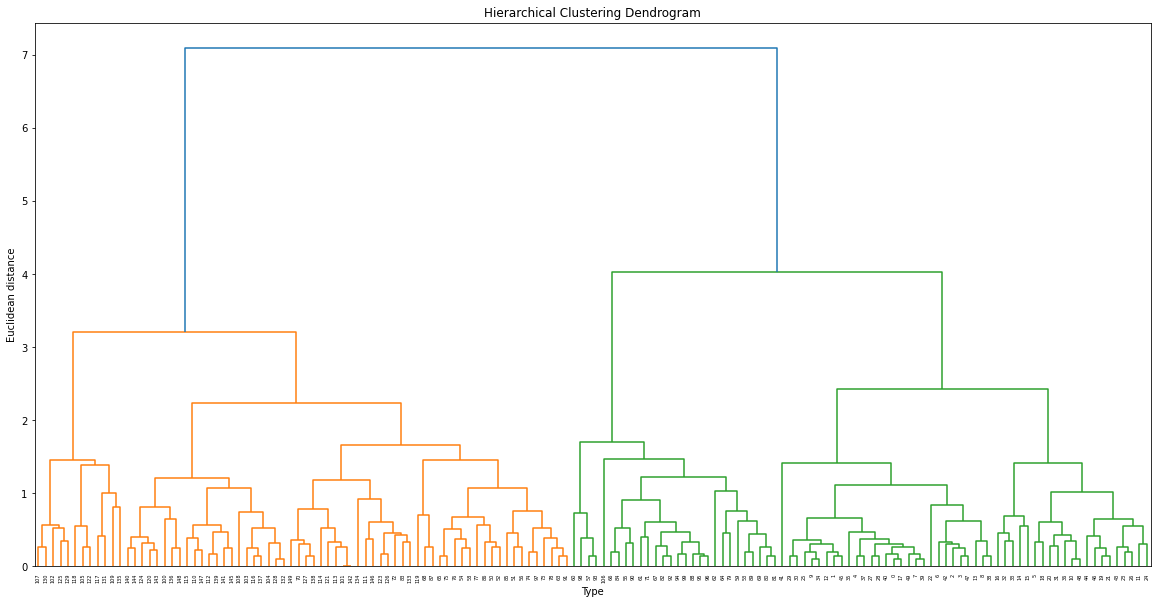

In [ ]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(iris_data, method = 'complete')
plt.figure(figsize=(20,10))
den = sch.dendrogram(Z);
plt.title('Hierarchical Clustering Dendrogram');
plt.xlabel('Type');
plt.ylabel('Euclidean distance');